# 1

## a)

$\because$

$$\begin{aligned}
\sigma(x) = \frac{1}{1+e^{-x}}
\end{aligned}$$

$$
g(x) = -x
$$

$\therefore$

$$\begin{aligned}
\frac{\partial}{\partial x} \sigma(x) &= \frac{1}{(1+e^{-x})^2}\cdot e^{-x} \cdot \frac{\partial}{\partial x}g(x) \\
&= \frac{1}{1+e^{-x}}\cdot \frac{e^{-x}}{1+e^{-x}}\cdot \frac{\partial}{\partial x}g(x) \\
&= \sigma(x)(1-\sigma(x))\frac{\partial}{\partial x}g(x)
\end{aligned}$$

So the derivative can be written as $\sigma(x)(1-\sigma(x)$

## b)




## c)




## d)




# 2



(100, 3)
(100,)
train: [-0.06945354  0.01090728  0.0009913 ]
cost: 0.8954009115851668
a:-11.003037608675866
b: 70.06330538769483
Accuracy: 60.00%


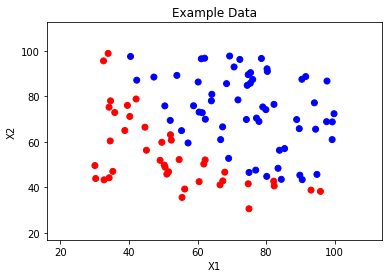

In [51]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


# (a)

def load_data(filename):
    """should load the data from the given file, returning a matrix 
    for X and a vector for y"""
    # TODO your code here
    data = pd.read_csv(filename, sep=',', header=None).values
    x, y = data[:, :2], data[:, 2]
    return x, y;


X, y = load_data('ex_data.csv')
m = len(y)

# extend the data in order to add a bias term to the dot product with theta
X = np.column_stack([np.ones(m), X])

print(X.shape)
print(y.shape)

# now plot the data
# TODO your code here
minX, maxX = np.min(X[:,1]), np.max(X[:,1])
hsp = (maxX - minX) / 5
minX, maxX = minX - hsp, maxX + hsp
minY, maxY = np.min(X[:,2]), np.max(X[:,2])
vsp = (maxY - minY) / 5
minY, maxY = minY - vsp, maxY + vsp

from matplotlib.colors import ListedColormap

colors = ListedColormap(['r', 'b'])
ax = plt.axes()
ax.scatter(X[:,1], X[:,2], c=y, cmap=colors)
ax.set_xlim(minX, maxX)
ax.set_ylim(minY, maxY)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Example Data')
# plt.show()


# (b)
def sigmoid(x):
    # TODO your code here
    return ((1 + np.exp(-x)) ** (-1))


# (c)

def cost(theta):
    """compute the cost function from the parameters theta"""
    # TODO your code here
    sigma0 = sigmoid(np.dot(X[0==y,:], theta))
    sigma1 = sigmoid(np.dot(X[1==y,:], theta))
    c = -(np.sum(np.log(sigma0)) +
           (np.sum(np.log(1-sigma1)))) / len(y)
    return c


def grad(theta):
    """compute the derivative of the cost function with respect to theta"""
    # TODO your code here
    sigma = sigmoid(np.dot(X, theta))
    g = np.dot((sigma-y), X) / len(y)
    return g


# (d)
def GD(gradf, theta0, lr, steps, costf):
    """
    Args:
      gradf: gradient of the cost function
      theta0: initail value for the parameters theta
      lr: learing rate
      steps: total number of iterations to perform
      costf: cost function (only needed for debugging/outputting intermediate results)
    returns the final value for theta
    """
    # TODO your code here
    theta = theta0
    for _ in range(steps):
        theta -= lr * gradf(theta)
    return theta


# (e)
# use these parameters for training the model
train = GD(grad, np.zeros(3), 1e-5, 100000, cost)

# also plot the decisicon boundary and calculate the accuracy
# TODO your code here
a = -train[1]/train[2]
b = -train[0]/train[2]
print('train: {}'.format(train))
print('cost: {}'.format(cost(train)))
print('a:{}'.format(a))
print('b: {}'.format(b))
# print('({},{}),({},{})'.format(minX, maxX, minY, maxY))
acc = np.mean((np.dot(X,train) >= 0) == y)
print("Accuracy: {:.2f}%".format(acc*100))

# %whos
ax.plot([minX, maxX], [minX*a+b, maxX*a+b], color='red')
plt.show()
# fig = plt.figure()
# x0 = X[0==y,:]
# x1 = X[1==y,:]
# plt.plot(x0[:,1], x0[:,2], 'r.')
# plt.plot(x1[:,1], x1[:,2], 'b.')
# plt.grid(True)
# plt.show()
